<a href="https://colab.research.google.com/github/raviyadav44/Computer-vision-projects/blob/main/lda_svd_withcatsndogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ravi yadav
#roll no:2K19CSUN04016

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##STANDARD SCALER-
####this is the package used for standardisation of data for transforming the data into a Normal distribution.like z=(x-mu)/sigma
####where 
####mu-mean, which should we zero for a normal distribution
####sigma-standarddeviation,which should be 1 for nirmal distribution.

##MINMAX SCALER-
####This is the package used for scale down the data between [0-1].
####xnorm=(x-xmin)/(xmax-xmin)
####we generally use it for Deeplearning process.

ABOUT THE DATASET-
we have two csv files naming dogs and cats respectively.
the cat.csv has 80 different columns.
the dogs.csv also has 80 different columns.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline


In [ ]:

cat = pd.read_csv('/content/drive/MyDrive/cats_and_dogs/cat.csv')
dog = pd.read_csv('/content/drive/MyDrive/cats_and_dogs/dog.csv')


In [ ]:
cat.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80
0,64,23,250,137,55,173,18,134,19,47,109,164,41,78,108,108,247,105,158,54,103,4,23,102,239,72,42,21,168,109,112,177,22,233,15,236,250,137,32,5,178,109,24,107,53,241,226,143,5,136,98,100,89,66,228,92,255,88,230,56,160,69,6,24,195,183,239,35,154,154,122,18,87,106,174,69,28,60,223,101
1,64,23,250,137,55,173,18,134,19,44,109,164,32,78,110,94,247,99,158,54,98,4,116,102,239,80,42,22,168,109,77,170,31,233,15,140,250,93,32,5,178,91,24,113,54,240,226,156,9,131,87,93,101,57,232,91,77,83,230,57,158,72,0,19,166,187,237,53,141,135,118,37,80,99,179,71,32,50,224,107
2,64,20,250,137,55,173,18,134,19,56,109,175,40,92,120,85,245,89,158,54,89,4,227,111,239,95,42,37,168,95,41,170,92,233,15,4,250,77,32,5,178,57,24,90,56,236,230,155,11,132,87,79,93,55,228,94,77,86,234,61,158,69,2,25,157,199,231,72,147,162,77,24,76,57,163,73,28,63,225,106
3,64,20,244,144,55,173,13,134,19,72,109,181,34,96,108,92,245,89,158,65,89,4,149,102,239,91,42,37,168,95,80,160,116,233,12,4,250,175,46,5,190,19,23,103,57,236,232,158,9,128,89,58,48,50,222,92,76,84,236,61,158,66,7,23,186,179,206,92,141,154,109,14,71,32,169,76,38,53,230,105
4,64,9,244,151,55,158,13,134,19,72,110,158,32,78,97,92,245,77,158,54,98,4,49,97,239,91,42,37,168,109,112,149,96,233,12,12,250,175,104,5,178,4,24,99,58,243,226,165,6,126,88,29,45,52,224,97,82,91,227,61,160,67,3,23,184,138,191,138,151,153,139,17,71,106,193,77,22,43,233,110


In [ ]:
cat.shape

(4096, 80)

In [ ]:
dog.shape

(4096, 80)

In [ ]:
print(cat.shape)
cat.head()
cat = cat.T
dog = dog.T


(4096, 80)


In [ ]:
cat.shape

(80, 4096)

In [ ]:
dog.shape

(80, 4096)

In [ ]:
a = dog.iloc[5].values

In [ ]:
a

array([17,  8,  0, ...,  8,  0,  0])

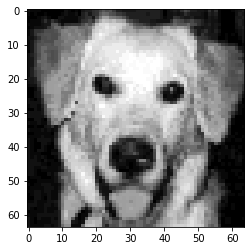

In [ ]:
plt.imshow(a.reshape(64,64).T,cmap='gray')

In [ ]:
b = cat.iloc[5].values

In [ ]:
b.shape

(4096,)

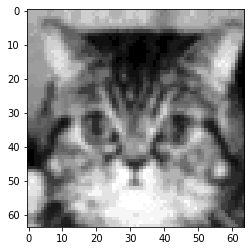

In [ ]:
plt.imshow(b.reshape(64,64).T,cmap='gray')

In [ ]:
total = pd.concat([dog,cat])

In [ ]:
total.shape

(160, 4096)

Transforming the data
and applying the LDA

In [ ]:
minmax = MinMaxScaler()
total = minmax.fit_transform(total)
total = pd.DataFrame(total)
lda = LinearDiscriminantAnalysis()


In [ ]:

import warnings
warnings.filterwarnings('ignore')


In [ ]:
total = total.reset_index()
total['index'][:80] = 1
total['index'][80:] = 0


#LOGISTIC REGRESSION BEFORE APPLYING LDA

In [ ]:
x = total.drop('index',1)
y = total['index']
x.shape

(160, 4096)

In [ ]:
log = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
log.fit(x_train,y_train)
logistic_predictions = log.predict(x_test)

print(accuracy_score(y_test,logistic_predictions))

0.8125


#LDA MODEL

In [ ]:
x = total.drop('index',1)
y = total['index']
x.shape
x_transformed = lda.fit_transform(x,y)
x_transformed.shape
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size = 0.3,random_state = 42)
lda_model = lda.fit(x_train,y_train)
prediction = lda.predict(x_test)
x_transformed.shape

(160, 1)

In [ ]:

prediction = lda.predict(x_test)
print('Accuracy Score for LDA Model is {}'.format(accuracy_score(y_test,prediction)))
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size = 0.3,random_state = 42)


Accuracy Score for LDA Model is 0.9583333333333334


#LOGISTIC REGRESSION AFTER APPLYING LDA

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)
logistic_predictions = log.predict(x_test)

print(accuracy_score(y_test,logistic_predictions))


0.9375


#SVD on Image dataset

In [ ]:
# vmin = 0
# vmax = 1
# image_bias = 1 # sometimes 1
# def plot_svd(A):
#     n = len(A)
#     imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
#     plt.show()
#     U, S, V = svd(A)

#     imgs = []
#     for i in range(n):
#         imgs.append(S[i]*np.outer(U[:,i],V[i]))

#     combined_imgs = []
#     for i in range(n):
#         img = sum(imgs[:i+1])
#         combined_imgs.append(img)
        
#     fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
#     for num, ax in zip(range(n), axes):
#         ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
#         ax.set_title(np.round(S[num],2), fontsize=80)
#     plt.show()
    
#     fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
#     for num, ax in zip(range(n), axes):
#         ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
#     plt.show()

#     return U,S,V

In [ ]:
D=np.array(cat.iloc[0].values)
D=D.reshape(2,-1)

In [ ]:
U, S, V = np.linalg.svd(D,full_matrices=False)

In [ ]:
print(U.shape, S.shape, V.shape)

(2, 2) (2,) (2, 2048)


In [ ]:
S=np.diag(S)

In [ ]:
r = 5
reconstruction = U[:,:r] @ S[0:r,:r] @ V[:r,:]

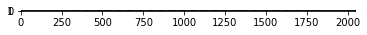

In [ ]:
plt.imshow(reconstruction)